# Convolution

## Image convolution with a kernel

In [12]:
import pandas as pd
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

from IPython.display import HTML

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 13]

Let's load some images

In [13]:
img1 = plt.imread('zebra.jpg')
img2 = plt.imread('lion.jpg')

In [14]:
img1.shape

(141, 250, 3)

We'll look at gray scale images, so we'll take the mean of the 3 composite colors (Red, Green ,Blue)

In [15]:
# the [...,:3] syntax limits the image to the RGB channels, removing alpha if there was any
gray1 = np.mean(img1[...,:3], -1)
gray2 = np.mean(img2[...,:3], -1)

In [16]:
# an image is after all just a bunch of numbers
gray1

array([[197.66666667, 194.66666667, 195.66666667, ..., 196.        ,
        185.        , 169.33333333],
       [201.66666667, 195.66666667, 190.66666667, ..., 183.        ,
        187.        , 179.33333333],
       [179.66666667, 194.66666667, 201.66666667, ..., 184.        ,
        188.        , 191.33333333],
       ...,
       [176.33333333, 190.33333333, 163.33333333, ..., 152.33333333,
        181.33333333, 158.        ],
       [182.33333333, 137.33333333, 167.33333333, ..., 159.        ,
        175.        , 150.        ],
       [194.33333333, 183.33333333, 179.33333333, ..., 158.        ,
        178.        , 153.        ]])

In [17]:
gray1.shape

(141, 250)

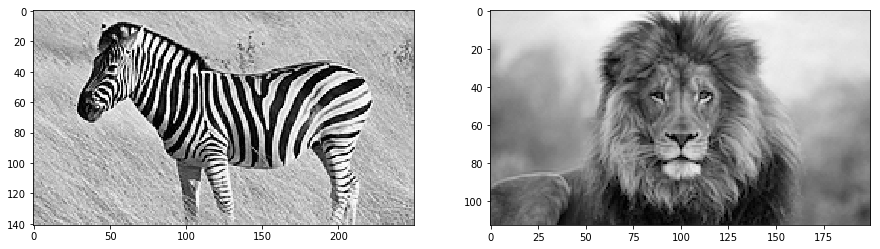

In [18]:
# plt.imshow(gray, cmap='gray')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs[0].imshow(gray1, cmap='gray')
axs[1].imshow(gray2, cmap='gray')

## Let's now look at kernel convolution

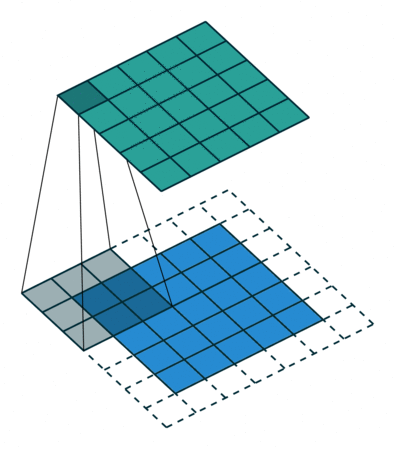

### Convolution is a very common method for image processing.

#### Convolving a kernel with an image, consists in scanning the kernel over the image, and computing the sum of the 1-to-1 multiplication of the overlapping pixels

#### The following kernel examples are kernels that are designed for specific tasks.

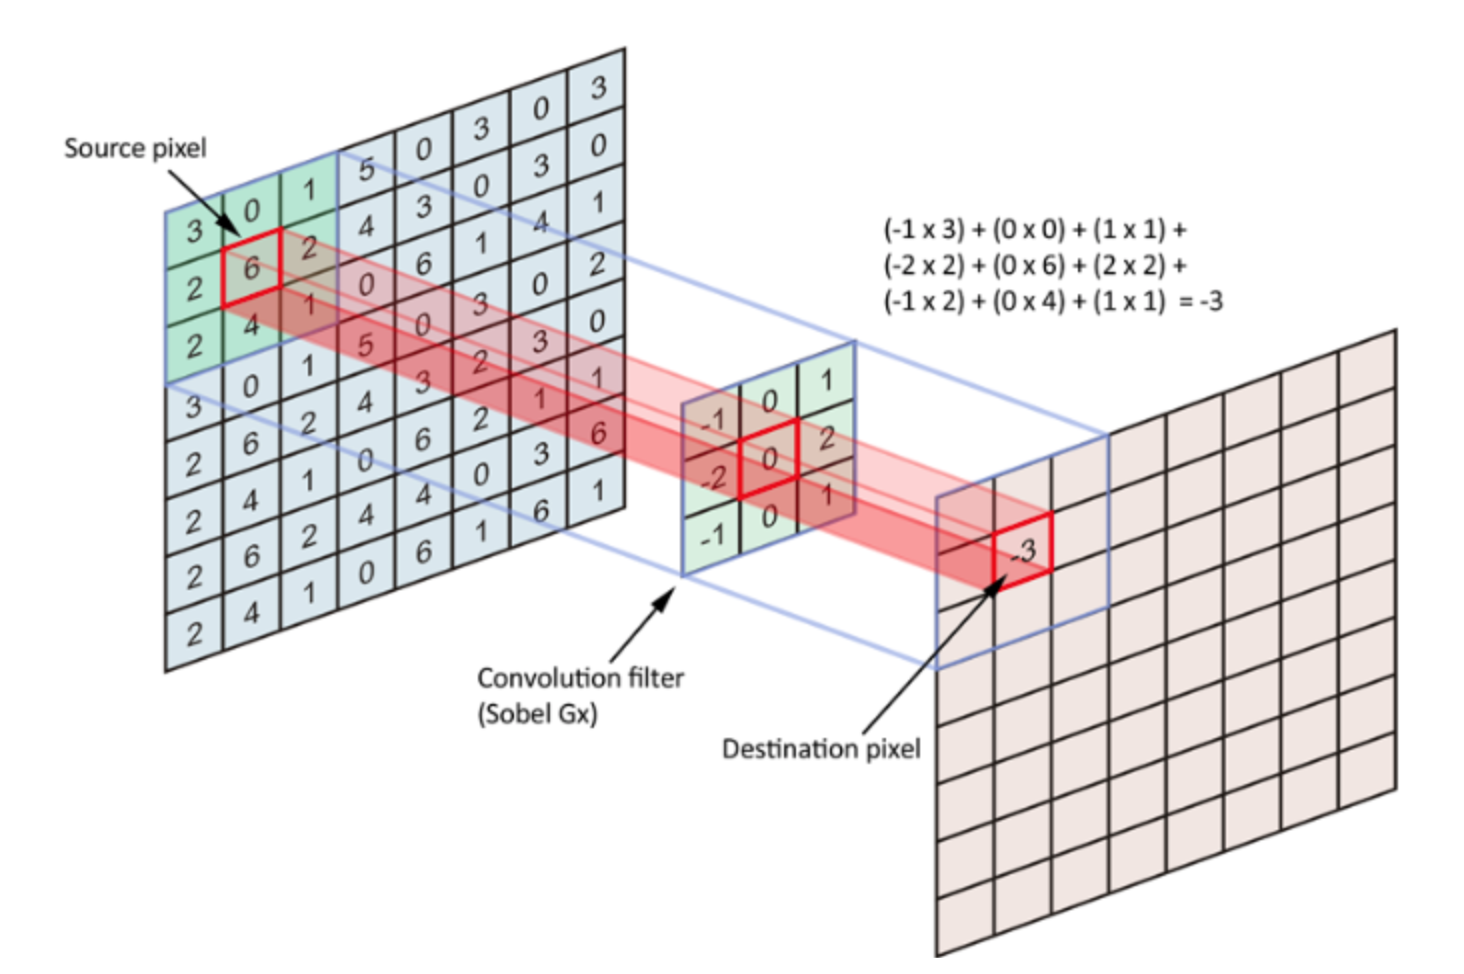

The filter slides over the input and performs its output on the new layer. — Source: https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

## Average kernel

In [19]:
# 1's everywhere
# this will have the effect of averaging the pixels around the 3x3 area, which essentially 'blurs' the image.
avg_kernel = np.ones(shape=(3,3))

In [20]:
avg_kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [21]:
# to be normalized, it should be divided by the sum of the values, so it comes:
avg_kernel = avg_kernel / 9.0
avg_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

### See the convolution animation

https://github.com/streamnsight/cnn/blob/master/convolution.mp4?raw=true

In [22]:
%%HTML
<video width="1800" height="1200" controls style="width: 100%; height: auto">
  <source src="https://github.com/streamnsight/cnn/blob/master/convolution.mp4?raw=true" type="video/mp4">
</video>

In [23]:
avg1 = signal.convolve2d(gray1, avg_kernel)
avg2 = signal.convolve2d(gray2, avg_kernel)

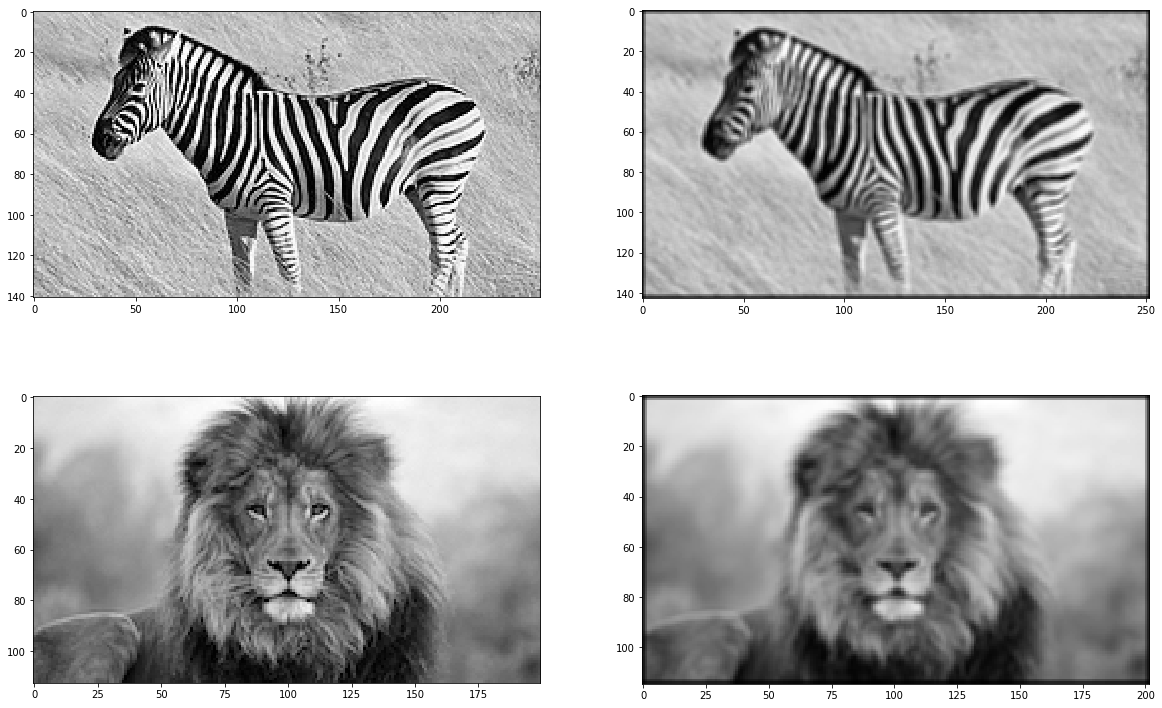

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].imshow(gray1, cmap='gray')
axs[0,1].imshow(avg1, cmap='gray')
axs[1,0].imshow(gray2, cmap='gray')
axs[1,1].imshow(avg2, cmap='gray')

### If we use a larger kernel, the effect is amplified

In [25]:
avg_kernel = np.ones(shape=(5,5)) / 25.0

In [26]:
avg1 = signal.convolve2d(gray1, avg_kernel)
avg2 = signal.convolve2d(gray2, avg_kernel)

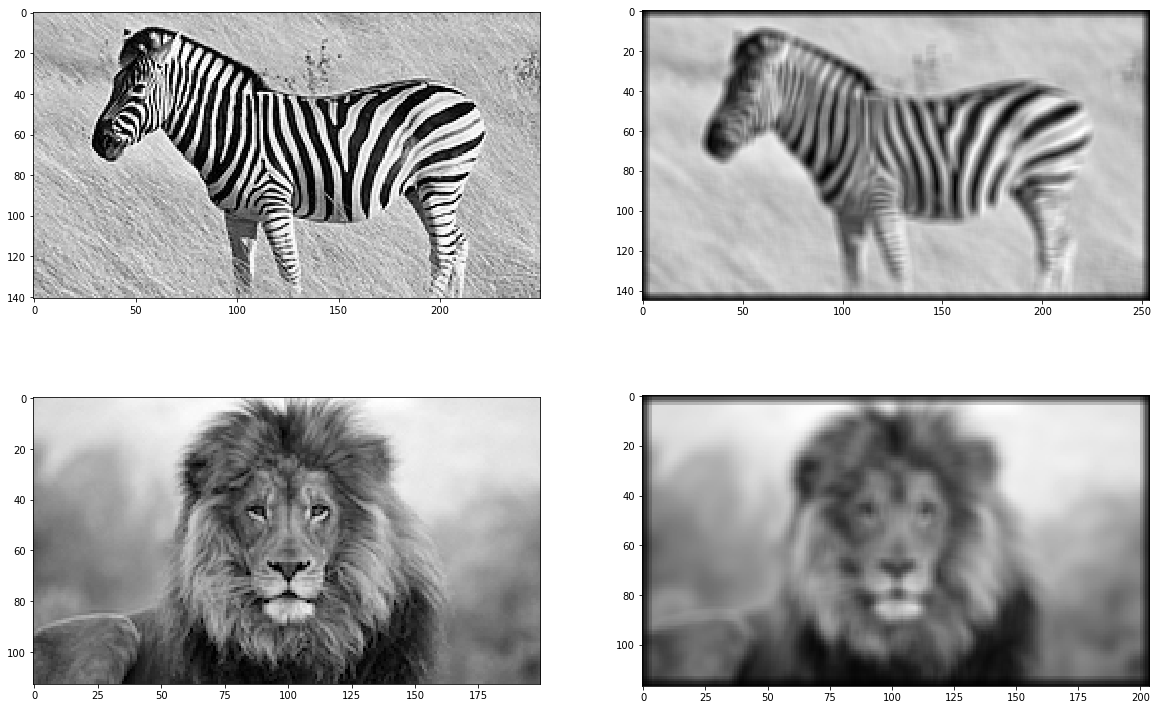

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].imshow(gray1, cmap='gray')
axs[0,1].imshow(avg1, cmap='gray')
axs[1,0].imshow(gray2, cmap='gray')
axs[1,1].imshow(avg2, cmap='gray')

## Vertical edge detect kernel

In [28]:
v_edge_kernel = np.array([[-1.0, 0.0, 1.0],
                          [-1.0, 0.0, 1.0],
                          [-1.0, 0.0, 1.0]])

In [29]:
v_edge1 = signal.convolve2d(gray1, v_edge_kernel)
v_edge2 = signal.convolve2d(gray2, v_edge_kernel)

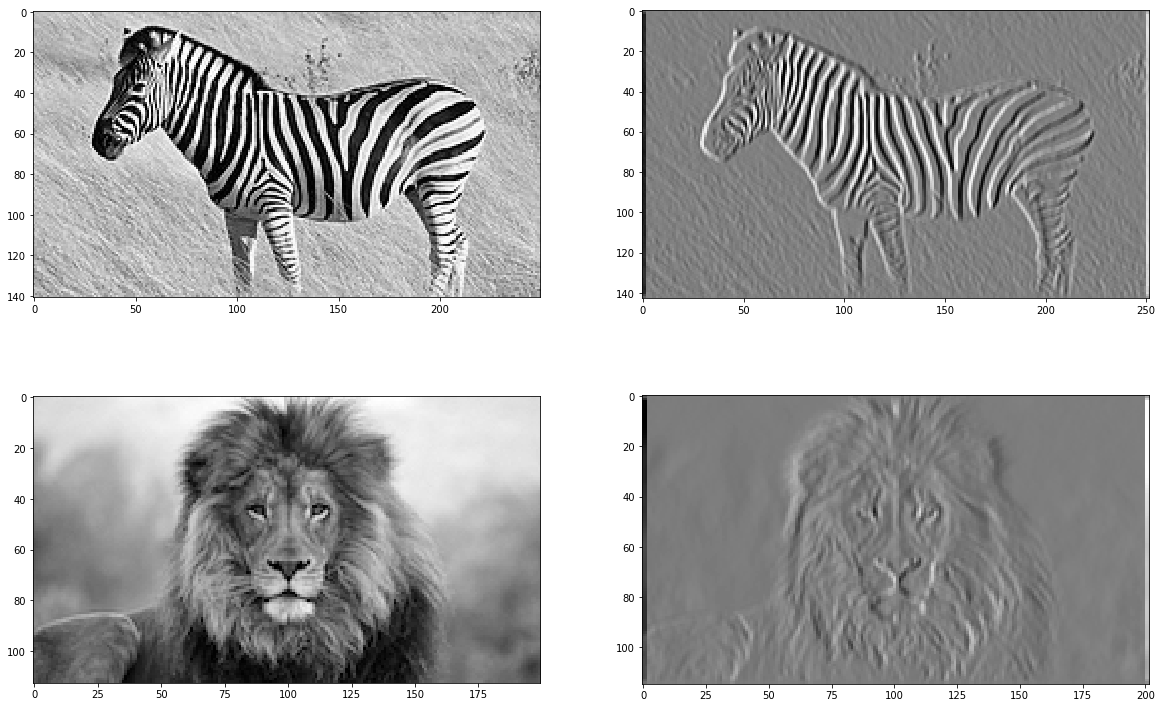

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].imshow(gray1, cmap='gray')
axs[0,1].imshow(v_edge1, cmap='gray')
axs[1,0].imshow(gray2, cmap='gray')
axs[1,1].imshow(v_edge2, cmap='gray')

## line detection kernels

In [31]:
h_line_kernel = np.array([[-1.0, -1.0, -1.0],
                          [ 2.0,  2.0,  2.0],
                          [-1.0, -1.0, -1.0]])

v_line_kernel = np.array([[-1.0,  2.0, -1.0],
                          [-1.0,  2.0, -1.0],
                          [-1.0,  2.0, -1.0]])

l45_kernel    = np.array([[ 2.0, -1.0, -1.0],
                          [-1.0,  2.0, -1.0],
                          [-1.0, -1.0,  2.0]])

r45_kernel    = np.array([[-1.0, -1.0,  2.0],
                          [-1.0,  2.0, -1.0],
                          [ 2.0, -1.0, -1.0]])

edge_kernel   = np.array([[-1.0, -1.0, -1.0],
                          [-1.0,  8.0, -1.0],
                          [-1.0, -1.0, -1.0]])

In [32]:
h_line1 = signal.convolve2d(gray1, h_line_kernel)
v_line1 = signal.convolve2d(gray1, v_line_kernel)
l45_line1 = signal.convolve2d(gray1, l45_kernel)
r45_line1 = signal.convolve2d(gray1, r45_kernel)
edge1 = signal.convolve2d(gray1, edge_kernel)

h_line2 = signal.convolve2d(gray2, h_line_kernel)
v_line2 = signal.convolve2d(gray2, v_line_kernel)
l45_line2 = signal.convolve2d(gray2, l45_kernel)
r45_line2 = signal.convolve2d(gray2, r45_kernel)
edge2 = signal.convolve2d(gray2, edge_kernel)

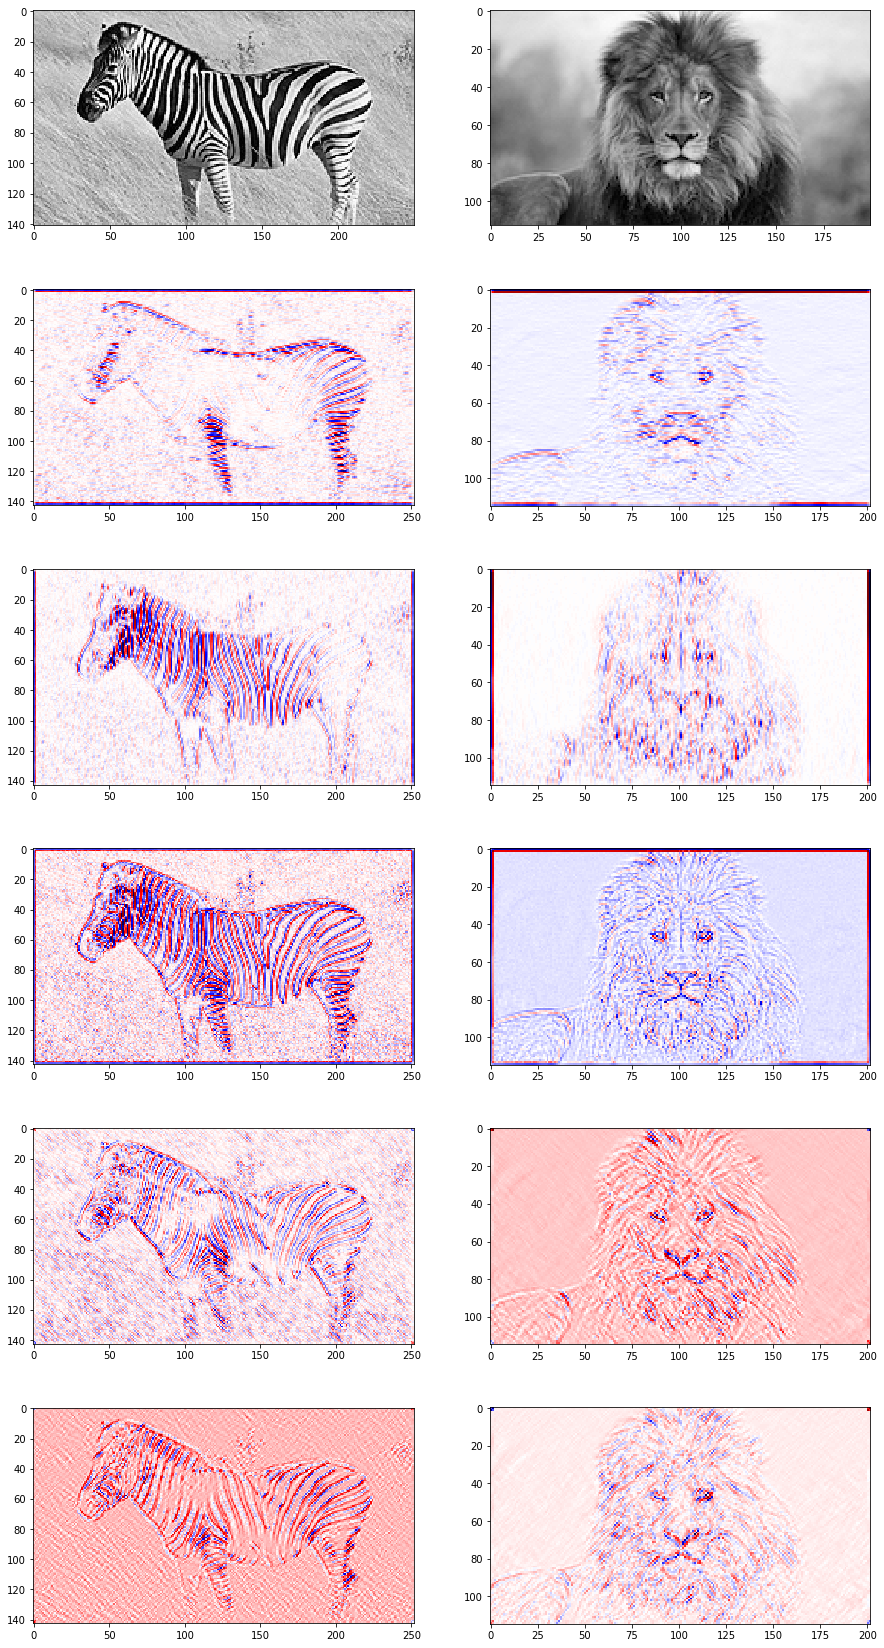

In [33]:
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 30))
axs[0,0].imshow(gray1, cmap='gray')
axs[0,1].imshow(gray2, cmap='gray')
axs[1,0].imshow(h_line1, cmap='seismic')
axs[1,1].imshow(h_line2, cmap='seismic')
axs[2,0].imshow(v_line1, cmap='seismic')
axs[2,1].imshow(v_line2, cmap='seismic')
axs[3,0].imshow(edge1, cmap='seismic')
axs[3,1].imshow(edge2, cmap='seismic')
axs[4,0].imshow(l45_line1, cmap='seismic')
axs[4,1].imshow(l45_line2, cmap='seismic')
axs[5,0].imshow(r45_line1, cmap='seismic')
axs[5,1].imshow(r45_line2, cmap='seismic')

## Sobel edge operator

In [34]:
sobel_v_kernel = np.array([[-1.0, -2.0, -1.0],
                           [ 0.0,  0.0,  0.0],
                           [ 1.0,  2.0,  1.0]])

In [35]:
sobel_v_edge1 = signal.convolve2d(gray1, sobel_v_kernel)
sobel_h_edge1 = signal.convolve2d(gray1, sobel_v_kernel.transpose())

sobel_v_edge2 = signal.convolve2d(gray2, sobel_v_kernel)
sobel_h_edge2 = signal.convolve2d(gray2, sobel_v_kernel.transpose())

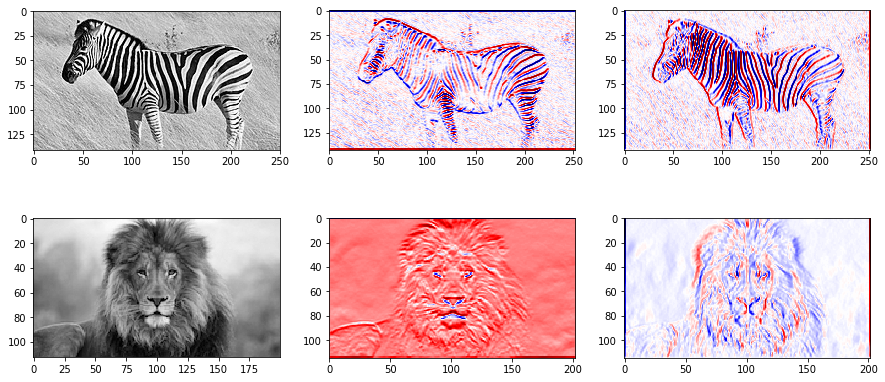

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
axs[0,0].imshow(gray1, cmap='gray')
axs[1,0].imshow(gray2, cmap='gray')
axs[0,1].imshow(sobel_v_edge1, cmap='seismic')
axs[1,1].imshow(sobel_v_edge2, cmap='seismic')
axs[0,2].imshow(sobel_h_edge1, cmap='seismic')
axs[1,2].imshow(sobel_h_edge2, cmap='seismic')

## Laplacian

In [37]:
laplacian_kernel = np.array([[ 0.0, -1.0,  0.0],
                             [-1.0,  4.0, -1.0],
                             [ 0.0, -1.0,  0.0]])

In [38]:
laplacian = signal.convolve2d(gray1, laplacian_kernel)

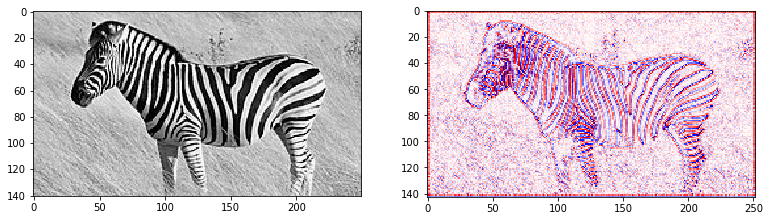

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(gray1, cmap='gray')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(laplacian, cmap='seismic')

# colored images

In [40]:
# img = plt.imread('zebra.jpg')
img = plt.imread('lion.jpg')
R = img[...,0]
G = img[...,1]
B = img[...,2]

### A colored image is simply a stack of 3 images (Red, Green, Blue). 
### A kernel convolution on each slice of a colored image ends up highlighting features that depend on the color. That will help make a model more apt at recognizing certain features associated with a specific color.

In [41]:
laplacianR = signal.convolve2d(R, laplacian_kernel)
laplacianG = signal.convolve2d(G, laplacian_kernel)
laplacianB = signal.convolve2d(B, laplacian_kernel)

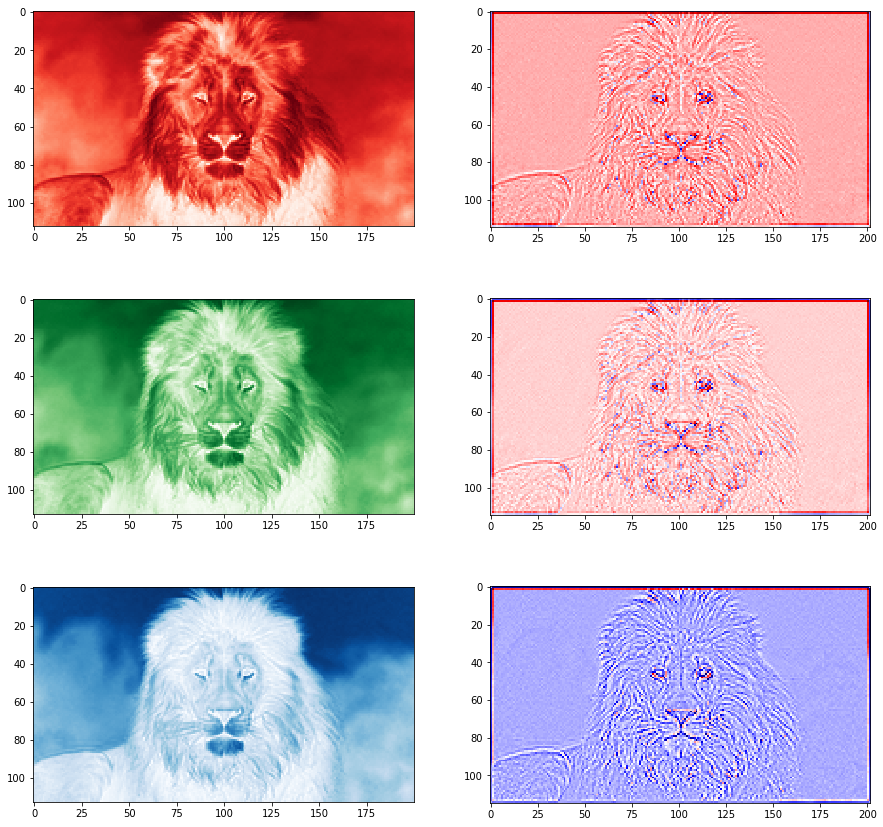

In [42]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axs[0,0].imshow(R, cmap='Reds')
axs[0,1].imshow(laplacianR, cmap='seismic')
axs[1,0].imshow(G, cmap='Greens')
axs[1,1].imshow(laplacianG, cmap='seismic')
axs[2,0].imshow(B, cmap='Blues')
axs[2,1].imshow(laplacianB, cmap='seismic')

## Conclusion
### A kernel convolution transforms the input image into an output representation that highlights specific features (lines, edges, etc..) of the input image. 

### In a Convolutional Neural Network, a convolution layer is composed of a stack of convolution kernels that transform the input into multiple output images of 'features' highlighted by the kernel convolutions. 

### The kernel values are coefficients that will be 'learned' by the model. This is how the model learns features specific to the images it is trained on.